In [165]:
import numpy as np
import matplotlib.pyplot as plt

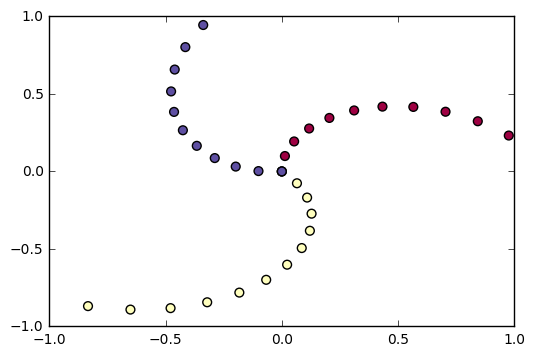

In [177]:
# generate random sample data
N = 300 # number of samples per class
k = 3 # number of classes
D = 2 # dimensionality
X = np.zeros((N*k,D)) # initialize
y = np.zeros(N*k) # --do--
r = np.linspace(0.0,30.0,N) # radius

np.random.seed(0)

for i in xrange(k):
    ix = range(i*N,N*(i+1))
    t = np.linspace(i*40,(i+1)*40,N) #theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = i
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [178]:
# SVM training
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

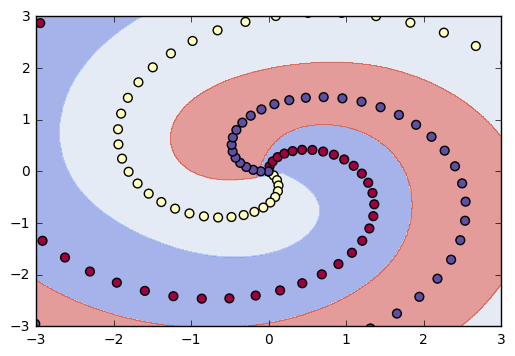

In [179]:
# now plot the decision boundary along with the training samples
x_min = -3.0
x_max = 3.0
y_min = -3.0
y_max = 3.0
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Zs = model.predict(np.c_[xx.ravel(), yy.ravel()])
# np.c_ : column wise stacking
# np.ravel : to 1D array
Z = Zs.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx,yy,Z, cmap = plt.cm.coolwarm, alpha=0.5)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()